In [1]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



C:\Users\vivie\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
file_path = "https://raw.githubusercontent.com/MiliCod/Insights-Unveiled-A-Data-Driven-Exploration-of-Student-Stress-Factors/main/StressLevelDataset.csv"
df=pd.read_csv(file_path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
parametre1='anxiety_level'
parametre2="self_esteem"
parametre3='depression'
dfa=df[[parametre1,parametre2,parametre3]]
dfa



,anxiety_level,self_esteem,depression
0,14,20,11
1,15,8,15
2,12,18,14
3,16,12,15
4,16,28,7
...,...,...,...
1095,11,17,14
1096,9,12,8
1097,4,26,3
1098,21,0,19


In [4]:
#center and reduce our data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dfa)
x_scaled

array([[ 0.48020782,  0.24861241, -0.20139257],
       [ 0.64374608, -1.09358954,  0.31650766],
       [ 0.15313129,  0.02491208,  0.18703261],
       ...,
       [-1.15517484,  0.91971338, -1.23719303],
       [ 1.62497568, -1.98839084,  0.8344079 ],
       [ 1.13436088, -1.31728986,  0.31650766]])

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\vivie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[3300.0,
 1398.3906023923016,
 865.3052803129717,
 715.3903713569716,
 626.3593004309596,
 555.7701488840278,
 510.7211614441583,
 465.79660221565797,
 427.8311227044237,
 388.32723516816543]

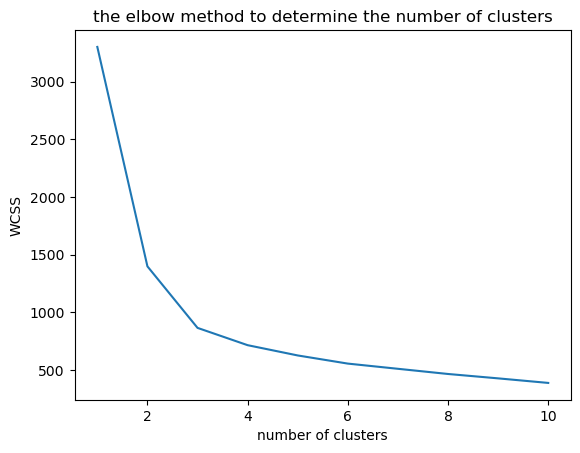

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('the elbow method to determine the number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans_etats = KMeans(n_clusters=3, init = 'k-means++')


In [8]:
kmeans_etats.fit(x_scaled)


KMeans(n_clusters=3)

In [9]:
clusters = kmeans_etats.predict(x_scaled)


In [10]:
dfa['cluster']=clusters
dfa

C:\Users\vivie\AppData\Local\Temp\ipykernel_18044\2827658313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=clusters


,anxiety_level,self_esteem,depression,cluster
0,14,20,11,2
1,15,8,15,1
2,12,18,14,2
3,16,12,15,1
4,16,28,7,2
...,...,...,...,...
1095,11,17,14,2
1096,9,12,8,2
1097,4,26,3,0
1098,21,0,19,1


In [11]:
dfa_clusters = dfa.groupby(['cluster']).median().round(0)  
dfa_clusters

,anxiety_level,self_esteem,depression
cluster,,,
0,4.0,27.0,4.0
1,18.0,8.0,22.0
2,11.0,20.0,12.0


In [12]:
for i in range(4):
    print(f'Cluster {i}')
    print(dfa[dfa.cluster == i].index.tolist())
    print()

Cluster 0
[6, 12, 14, 16, 17, 20, 22, 25, 30, 34, 37, 39, 40, 41, 42, 45, 47, 49, 50, 52, 57, 58, 59, 60, 61, 62, 65, 69, 70, 72, 73, 77, 80, 83, 98, 104, 105, 107, 110, 112, 120, 122, 127, 130, 135, 136, 138, 140, 143, 145, 150, 156, 158, 159, 164, 167, 170, 173, 174, 180, 183, 187, 194, 197, 212, 214, 218, 224, 230, 231, 232, 239, 244, 245, 246, 249, 252, 254, 256, 257, 259, 260, 262, 268, 269, 271, 274, 281, 285, 286, 287, 290, 291, 292, 300, 302, 304, 305, 306, 310, 314, 315, 317, 318, 321, 326, 327, 331, 332, 333, 335, 338, 356, 358, 359, 363, 365, 367, 368, 369, 370, 377, 379, 381, 389, 395, 397, 402, 407, 418, 419, 420, 421, 425, 428, 432, 433, 434, 436, 438, 439, 440, 442, 451, 454, 456, 465, 472, 473, 479, 486, 497, 500, 502, 505, 510, 512, 517, 526, 529, 530, 533, 541, 543, 544, 547, 550, 552, 555, 556, 559, 566, 568, 573, 576, 579, 581, 582, 584, 586, 588, 599, 600, 604, 605, 609, 613, 614, 621, 624, 628, 630, 632, 637, 638, 640, 643, 646, 647, 650, 651, 652, 653, 654, 657, 

In [13]:
# Assuming max_values contains the maximum values for each column in dfa
max_values = dfa[[parametre1, parametre2, parametre3]].max()




# Assuming target_columns is the list ['parametre1', 'parametre2', 'parametre3', 'parametre4']
values = {}
for column in dfa_clusters:
    try:
        user_input = float(input(f'Give a score between 1 and 10 for your level of {column}: '))
        if 0 <= user_input <= 10:
            values[column] = user_input  # Store the valid input in the dictionary
        else:
            print("Value must be between 1 and 10. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

        
        
# Calculate scaled values
scaled_values = {}
for column in dfa_clusters:
    scaled_value = (values[column])
    scaled_values[column] = scaled_value

# Now 'scaled_values' dictionary contains the scaled values for each column
print(scaled_values)


Give a score between 1 and 10 for your level of anxiety_level:  9
Give a score between 1 and 10 for your level of self_esteem:  2
Give a score between 1 and 10 for your level of depression:  9


{'anxiety_level': 9.0, 'self_esteem': 2.0, 'depression': 9.0}


In [14]:
# Create a DataFrame with user values
user_df = pd.DataFrame([scaled_values]) / 10
#print(user_df)

# Normalize each criterion of reference clusters in the same way
dfa_clusters_normalized = dfa_clusters / max_values
#print(dfa_clusters_normalized)

# Calculate the Euclidean distance between normalized values and cluster centers
distances = np.linalg.norm(user_df.values - dfa_clusters_normalized.values[:, :3], axis=1)
#print(distances)

# Find the index of the closest cluster
closest_cluster_index = np.argmin(distances)
#print(closest_cluster_index)

# Retrieve the cluster number
predicted_cluster = dfa_clusters_normalized.index[closest_cluster_index]

print(f"The normalized user values are closest to Cluster {predicted_cluster}")

# Calculate reliability based on the inverse of the distance
reliability = 1 / (1 + distances[closest_cluster_index])

# Display reliability
print(f"Reliability of the result: {reliability * 100}%")


The normalized user values are closest to Cluster 1
Reliability of the result: 89.5775130031153%


In [15]:
text1 = """
+-----------------------------------------------------------------+
| You are currently going through a period marked by high levels  |
| of anxiety and relatively low self-esteem. This combination     |
| can have a significant impact on your overall well-being. To    |
| support your personal growth, consider exploring stress         |
| management techniques. It might also be beneficial to address   |
| your negative thoughts and find concrete ways to boost your     |
| self-esteem.                                                    |
|                                                                 |
| Bottom line: By investing in managing anxiety and building      |
| self-confidence, you pave the way for a significant improvement |
| in your overall well-being. Efforts to understand and overcome  |
| these challenges can lead to positive changes in your daily     |
| life. The current situation indicates levels of anxiety and     |
| self-esteem that can be considered critical. For support        |
| tailored to your specific needs, it is strongly recommended to  |
| consult a mental health professional.                           |
+-----------------------------------------------------------------+
"""



In [16]:
text2 = """
+-----------------------------------------------------------------+
| You are currently going through a phase characterized by a      |
| positive mental state, manifested by low anxiety, high          |
| self-esteem, and low depression. This combination is conducive  |
| to positive mental balance. Continue to cultivate this positive |
| mental balance by exploring ways to strengthen your emotional   |
| resources. Continue practices that help maintain your           |
| psychological well-being.                                       |
|                                                                 |
| Bottom line: Your current situation is indicative of good       |
| mental health. Continue to cultivate positive habits to promote |
| your personal growth. You seem to be in a wellness range that   |
| does not cause major concerns. Continuing your current          |
| practices is encouraged to maintain your positive mental state. |
+-----------------------------------------------------------------+
"""


In [17]:
text3 = """
+-----------------------------------------------------------------+
| You are currently experiencing moderate levels of anxiety,      |
| self-esteem, and depression. This psychological configuration   |
| suggests a relative balance in your emotional well-being. To    |
| strengthen your emotional well-being, identify specific sources |
| of stress and explore methods tailored to your situation. A     |
| proactive approach to managing these sources of stress could    |
| help improve your mental state.                                 |
|                                                                 |
| Bottom line: Your psychological state seems to react variably   |
| to situations, a normal reaction to life's challenges.          |
| Understanding the factors behind this variability can be an     |
| asset to better manage your emotional well-being. Although your |
| well-being levels are moderate, it is recommended that you      |
| remain vigilant about your mental health. If symptoms persist,  |
| consider consulting a professional for additional personalized  |
| support.                                                        |
+-----------------------------------------------------------------+
"""


In [18]:
# Retrieve the values of anxiety_level, self_esteem, and depression for the predicted cluster
predicted_values = dfa_clusters.loc[predicted_cluster, [parametre1, parametre2, parametre3]]


if predicted_values[parametre1] == 18.0 and predicted_values[parametre2] == 8.0 and predicted_values[parametre3] == 22.0:
    print(text1)
    
if predicted_values[parametre1] == 4.0 and predicted_values[parametre2] == 27.0 and predicted_values[parametre3] == 4.0:
    print(text2)
    
if predicted_values[parametre1] == 11.0 and predicted_values[parametre2] == 20.0 and predicted_values[parametre3] == 12.0:
    print(text3)
    




+-----------------------------------------------------------------+
| You are currently going through a period marked by high levels  |
| of anxiety and relatively low self-esteem. This combination     |
| can have a significant impact on your overall well-being. To    |
| support your personal growth, consider exploring stress         |
| management techniques. It might also be beneficial to address   |
| your negative thoughts and find concrete ways to boost your     |
| self-esteem.                                                    |
|                                                                 |
| Bottom line: By investing in managing anxiety and building      |
| self-confidence, you pave the way for a significant improvement |
| in your overall well-being. Efforts to understand and overcome  |
| these challenges can lead to positive changes in your daily     |
| life. The current situation indicates levels of anxiety and     |
| self-esteem that can be considered critical. 